In [0]:
import pandas as pd 
import numpy as np
from sklearn.svm import SVC # "Support Vector Classifier" 
clf = SVC(kernel='linear') 
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [0]:
df=pd.read_csv("train.csv")

In [141]:
df.pop("Loan_ID")
df.head(20)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [0]:
df.LoanAmount = df.LoanAmount.fillna(df.LoanAmount.mean())

In [0]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [0]:
df['LoanAmount_log'] = np.log(df['LoanAmount'])

In [0]:
df['TotalIncome'] = df['ApplicantIncome'] + df['CoapplicantIncome']
df['TotalIncome_log'] = np.log(df['TotalIncome'])

In [0]:
df['Capacity%'] = ((df['LoanAmount'] / df['TotalIncome']) *100).astype(float) 

In [0]:
df.Gender = df.Gender.fillna('Male')

In [0]:
df.Married = df.Married.fillna('Yes')

In [0]:
df.Credit_History = df.Credit_History.fillna('1.0')

In [0]:
df['Loan_Status'].replace(['Y','N'],[1,0],inplace=True)
df['Property_Area'].replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
df['Dependents'].replace(['0','1','2','3+'],[0,1,2,4],inplace=True)
df['Gender'].replace(['Male','Female'],[0,1],inplace=True)
df['Married'].replace(['Yes','No'],[1,0],inplace=True)
df['Education'].replace(['Graduate','Not Graduate'],[1,0],inplace=True)
df['Self_Employed'].replace(['Yes','No'],[1,0],inplace=True)
df.loc[(df.Dependents.isnull())&(df.Loan_Status==1),'Dependents']=0
df.loc[(df.Dependents.isnull())&(df.Loan_Status==0)&(df.Education==0),'Dependents']=4
df.loc[(df.Dependents.isnull())&(df.Loan_Status==0)&(df.Education==1),'Dependents']=2



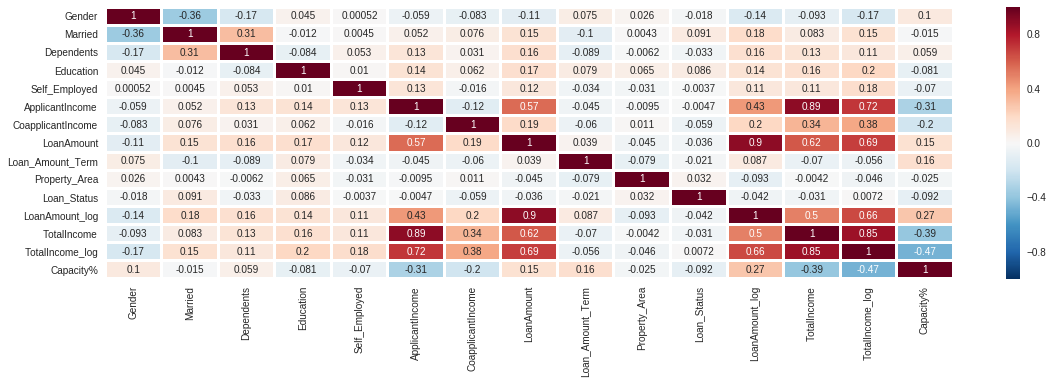

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize = (19,5))
sns.heatmap(df.corr(),annot = True,linewidths=2)

In [152]:
df.pop('ApplicantIncome')
df.pop('CoapplicantIncome')
df.pop('LoanAmount')
df.pop('Loan_Amount_Term')

df.describe()
df.isnull().sum()

Gender             0
Married            0
Dependents         0
Education          0
Self_Employed      0
Credit_History     0
Property_Area      0
Loan_Status        0
LoanAmount_log     0
TotalIncome        0
TotalIncome_log    0
Capacity%          0
dtype: int64

In [0]:
x=df.drop(labels='Loan_Status',axis=1)
y=df['Loan_Status']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=11)

In [154]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier()
lr = LogisticRegression()
clf.fit(x_train,y_train)
dtree.fit(x_train,y_train)
lr.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [155]:
from sklearn import metrics
metrics.accuracy_score(clf.predict(x_test),y_test)

0.7675675675675676

In [178]:
from sklearn import metrics
metrics.accuracy_score(lr.predict(x_test),y_test)

0.8108108108108109

In [157]:
from sklearn import metrics
metrics.accuracy_score(dtree.predict(x_test),y_test)

0.7189189189189189

In [158]:
from sklearn.ensemble import AdaBoostClassifier
abc = AdaBoostClassifier(n_estimators=50,learning_rate=0.01)
abc.fit(x_train, y_train)
from sklearn import metrics
metrics.accuracy_score(abc.predict(x_test),y_test)

0.8108108108108109

In [0]:
dtest=pd.read_csv("test.csv")

In [0]:
dtest['Gender'].replace(['Male','Female'],[0,1],inplace=True)
dtest['Married'].replace(['Yes','No'],[1,0],inplace=True)
dtest['Education'].replace(['Graduate','Not Graduate'],[1,0],inplace=True)
dtest['Self_Employed'].replace(['Yes','No'],[1,0],inplace=True)
dtest['Property_Area'].replace(['Urban','Semiurban','Rural'],[2,1,0],inplace=True)
dtest['Dependents'].replace(['0','1','2','3+'],[0,1,2,4],inplace=True)


In [0]:
dtest['Married'].fillna(1,inplace=True)
dtest['Loan_Amount_Term'].fillna(dtest['Loan_Amount_Term'].median(),inplace=True)
dtest['Dependents'].fillna(dtest['Dependents'].mode()[0],inplace=True)
dtest['Gender'].fillna(dtest['Gender'].mode()[0],inplace=True)
dtest['Credit_History'].fillna(dtest['Credit_History'].mode()[0],inplace=True)
dtest['Self_Employed'].fillna(dtest['Self_Employed'].mode()[0],inplace=True)
dtest['LoanAmount'].fillna(dtest['LoanAmount'].mean(),inplace=True)

In [0]:
dtest['TotalIncome']=dtest['ApplicantIncome']+dtest['CoapplicantIncome']
dtest['LoanAmount_log']=np.log(dtest['LoanAmount'])
dtest['TotaIncome_log']=np.log(dtest['TotalIncome'])
dtest['Capacity%'] = ((dtest['LoanAmount'] / dtest['TotalIncome']) *100).astype(float)

In [172]:
dtest.pop('ApplicantIncome')
dtest.pop('CoapplicantIncome')
dtest.pop('LoanAmount')
dtest.pop('Loan_Amount_Term')

0      360.0
1      360.0
2      360.0
3      360.0
4      360.0
5      360.0
6      360.0
7      360.0
8      240.0
9      360.0
10     360.0
11     360.0
12     180.0
13     360.0
14     360.0
15     360.0
16     360.0
17     360.0
18     360.0
19     180.0
20     360.0
21     180.0
22     360.0
23     360.0
24     360.0
25     360.0
26     360.0
27     360.0
28     360.0
29     180.0
       ...  
337    360.0
338    240.0
339    360.0
340    180.0
341    360.0
342    180.0
343    360.0
344    360.0
345    360.0
346    360.0
347    360.0
348    360.0
349    300.0
350    360.0
351    360.0
352    360.0
353    360.0
354    180.0
355    360.0
356    360.0
357    360.0
358    360.0
359    360.0
360    360.0
361    360.0
362    360.0
363    360.0
364    360.0
365    360.0
366    180.0
Name: Loan_Amount_Term, Length: 367, dtype: float64

In [0]:
sub=pd.read_csv('Sample_Submission.csv')
sub['Loan_ID']=dtest['Loan_ID']
dtest.pop("Loan_ID")
d_pre=clf.predict(dtest)

In [0]:
sub['Loan_Status']=d_pre
sub['Loan_Status'].replace([1,0],['Y','N'],inplace=True)

In [0]:
sub.to_csv('Sample_Submission.csv',index=False)

In [176]:
sub.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y
